### Function to fetch the data

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

### Load data using Pandas

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()
# housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Locate points (ArcGIS)

In [63]:
from arcgis.gis import GIS
my_gis = GIS()
# my_gis.map()

In [58]:
housingloc = housing[['longitude', 'latitude']]

In [ ]:
housingloc.head()

In [ ]:
housingloc[1000:2000].tail(5)

In [59]:
housingmap = my_gis.content.import_data(housingloc[1000:2000])

In [60]:
map1 = my_gis.map('California')

In [ ]:
map1.add_layer(housingmap)

In [61]:
map1

MapView(layout=Layout(height='400px', width='100%'))

### Locate points (Matplotlib)

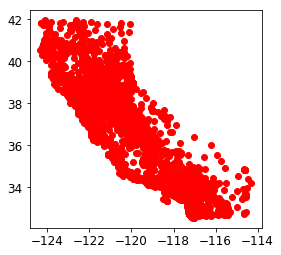

In [56]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

x = housing['longitude']
y = housing['latitude']

plt.plot(x, y, 'ro')
plt.axis('scaled')
plt.draw()

### Locate points (Folium)
https://python-visualization.github.io/folium/

In [4]:
lomin = housing['longitude'].min()
lomax = housing['longitude'].max()
lamin = housing['latitude'].min()
lamax = housing['latitude'].max()
print(lomin, lomax, lamin, lamax)

-124.35 -114.31 32.54 41.95


In [5]:
import folium

In [51]:
m = folium.Map(
#     location=[45.372, -121.6972],
#     bounds = [(32.54, -124.35), (41.95, -114.31)],
#     zoom_start=5,
    tiles='OpenStreetMap'
#     tiles='Stamen Toner'
#     tiles='Stamen Terrain'
#     tiles = 'Stamen Watercolor'
#     tiles = 'Mapbox Bright'
#     tiles = 'Mapbox Control Room'
#     tiles = 'CartoDB positron'
#     tiles = 'CartoDB dark_matter'
)

In [52]:
m.fit_bounds([(lamin, lomin), (lamax, lomax)])

In [53]:
listofpoints = [[row['latitude'], row['longitude']] for index, row in housing[:2000].iterrows()]

In [ ]:
listofpoints

In [54]:
for p in listofpoints:
    folium.Circle(location=p, radius=5, color='crimson', fill=True, fill_color='crimson').add_to(m)

In [55]:
m